## Plotting Genes of interest Mesoderm Kay2021Theconservedlongnon


GEO: GSE165231

doi:10.1093/cvr/cvab281

The conserved long non-coding RNA CARMA regulates cardiomyocyte differentiation.

Maryam Kay, Bahram M. Soltani, Mohamed Nemir, Parisa Aghagolzadeh,
Iole Pezzuto, Panagiotis Chouvardas, Francesco Ruberto, Fatemeh Movahedi,
Hassan Ansari, Hossein Baharvand, and Thierry Pedrazzini

Cardiovascular Research (2021) 00, 1–15

#### load modules

In [2]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.cluster.hierarchy as sch
import seaborn as sns

import pylab
from pylab import *

## load data

In [3]:
df_Kay = pd.read_table('~/Downloads/PythonNotebook/Mesoderm-Data_Kay2021_GSE165231/heat map final-Fig2C.txt').set_index('Gene')
df_Kay[:2]

,Day0-R1,Day0-R2,Day0-R3,Day3-R1,Day3-R2,Day3-R3,Day6-R1,Day6-R2,Day6-R3,Day10-R1,Day10-R2,Day10-R3
Gene,,,,,,,,,,,,
Zfp982,84.52577,74.561975,56.587216,5.819602,4.727085,5.737349,0.429495,0.848170,0.772362,0.752484,0.221293,0.322671
Nanog,266.29256,268.514400,300.566257,175.926898,161.692213,146.963590,9.183218,9.141495,7.232134,8.279653,7.956503,5.022370


In [17]:
df_Heatmap = df_Kay

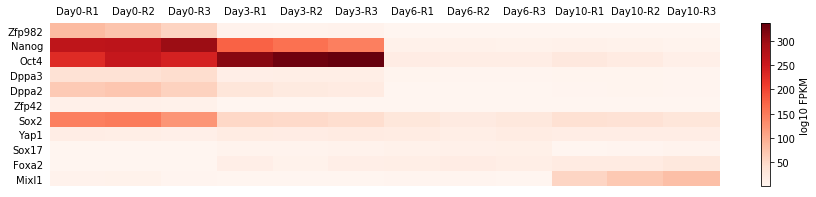

In [18]:
df_plotme = df_Heatmap#.sort_values(by=['gene_name'], ascending=[True], inplace=False)

column_labels = df_plotme.index #CGNP.axes[0]
row_labels = df_plotme.columns[:] #CGNP.axes[1]
data = df_plotme.values[:,:]

# figure size
#plt.figure(figsize=(20, 10))
fig, ax = plt.subplots(figsize=(15, 3))

# color scheme
heatmap = ax.pcolormesh(data, cmap='Reds', alpha=1) # plt.cm.bwr
    
# add colorbar
fig.colorbar(heatmap, ax=ax, label='log10 FPKM')#, ax=ax)

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
#plt.xticks(rotation=90)

#no frame
ax.set_frame_on(False)

# Turn off all the ticks
ax = plt.gca()
for t in ax.xaxis.get_major_ticks():
    t.tick1line.set_visible(False)
    t.tick2line.set_visible(False)
for t in ax.yaxis.get_major_ticks():
    t.tick1line.set_visible(False)
    t.tick2line.set_visible(False)
    
plt.show()
#fig.savefig("RIC-Heatmap.jpg", dpi=300)
#fig.savefig("Prot15-Heatmap.svg", dpi=300)
#fig.savefig("RIC-Heatmap.pdf", dpi=300)

In [19]:
log10_df_Heatmap = np.log10(df_Kay + 0.000001)
log10_df_Heatmap[:2]

,Day0-R1,Day0-R2,Day0-R3,Day3-R1,Day3-R2,Day3-R3,Day6-R1,Day6-R2,Day6-R3,Day10-R1,Day10-R2,Day10-R3
Gene,,,,,,,,,,,,
Zfp982,1.926989,1.872517,1.752718,0.764893,0.674594,0.758711,-0.367041,-0.071516,-0.112179,-0.123502,-0.655031,-0.491239
Nanog,2.425359,2.428968,2.477940,2.245332,2.208689,2.167210,0.962995,0.961017,0.859267,0.918012,0.900722,0.700909


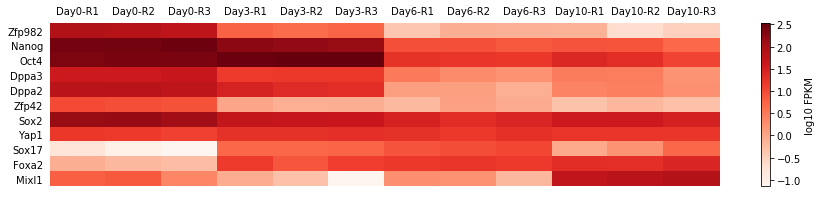

In [20]:
df_plotme = log10_df_Heatmap#

column_labels = df_plotme.index #CGNP.axes[0]
row_labels = df_plotme.columns[:] #CGNP.axes[1]
data = df_plotme.values[:,:]

# figure size
#plt.figure(figsize=(20, 10))
fig, ax = plt.subplots(figsize=(15, 3))

# color scheme
heatmap = ax.pcolormesh(data, cmap='Reds', alpha=1) # plt.cm.bwr
    
# add colorbar
fig.colorbar(heatmap, ax=ax, label='log10 FPKM')#, ax=ax)

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
#plt.xticks(rotation=90)

#no frame
ax.set_frame_on(False)

# Turn off all the ticks
ax = plt.gca()
for t in ax.xaxis.get_major_ticks():
    t.tick1line.set_visible(False)
    t.tick2line.set_visible(False)
for t in ax.yaxis.get_major_ticks():
    t.tick1line.set_visible(False)
    t.tick2line.set_visible(False)
    
plt.show()
#fig.savefig("RIC-Heatmap.jpg", dpi=300)
#fig.savefig("Prot15-Heatmap.svg", dpi=300)
#fig.savefig("RIC-Heatmap.pdf", dpi=300)

## Clustering
with seaborn

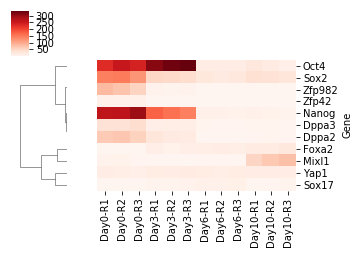

In [58]:
sns.clustermap(df_Heatmap, 
               metric="correlation",
               col_cluster=False,
               #standard_scale=1,
               cmap='Reds',
               figsize=(5, 3.5)
               #yticklabels=False
              )
plt.savefig("FPKM-Heatmap-Kay2021-All-cluster.svg", dpi=300)
plt.savefig("FPKM-Heatmap-Kay2021-All-cluster.png", dpi=300)

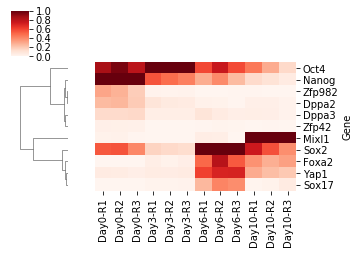

In [59]:
sns.clustermap(df_Heatmap, 
               metric="correlation",
               col_cluster=False,
               standard_scale=1,
               cmap='Reds',
               figsize=(5, 3.5)
               #yticklabels=False
              )
plt.savefig("FPKM-Heatmap-Kay2021-All-cluster-to1.svg", dpi=300)
plt.savefig("FPKM-Heatmap-Kay2021-All-cluster-to1.png", dpi=300)#

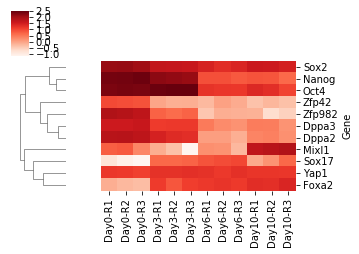

In [60]:
sns.clustermap(log10_df_Heatmap, 
              # metric="correlation",
               col_cluster=False,
               #standard_scale=1,
               cmap='Reds',
               figsize=(5, 3.5)
               #yticklabels=False
              )
#plt.savefig("log10-FPKM-Heatmap-Kay2021-All-cluster.svg", dpi=300)
#plt.savefig("log10-FPKM-Heatmap-Kay2021-All-cluster.png", dpi=300)